# 密度聚類 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN 是一種基於密度的聚類算法，能夠發現形狀不規則的聚類並有效處理噪聲點。它不需要事先指定聚類的數量，適合用來處理具有不同密度的資料集。

## 主要特點
- **基於密度的聚類**：DBSCAN 根據資料點周圍的密度來進行聚類，對於密度較高的區域形成聚類，密度較低的區域則被視為噪聲。
- **無需指定聚類數量**：不同於 K-means，DBSCAN 無需預先指定聚類數量 \( K \)，其聚類數量由資料本身決定。
- **能處理噪聲**：DBSCAN 可以有效識別並排除噪聲點。

## 主要參數
1. **ε (Epsilon)**：
   - 指定鄰域的半徑，表示一個點的鄰居的最大距離。
2. **MinPts (最小點數)**：
   - 一個聚類所需的最小點數，若一個區域內的點數超過此值，則視為密度區域。
3. **核心點 (Core Points)**：
   - 一個點如果在其ε鄰域內有至少 MinPts 個點，則該點為核心點。
4. **邊界點 (Border Points)**：
   - 位於核心點ε鄰域內，但鄰域內的點數少於 MinPts 的點。
5. **噪聲點 (Noise Points)**：
   - 既不在任何核心點的ε鄰域內，也無法成為邊界點的點，會被視為噪聲。

## 工作原理
1. **選擇核心點**：對於每個資料點，計算其ε鄰域內的點數。如果該點鄰域內的點數大於或等於 MinPts，則該點為核心點。
2. **擴展聚類**：從一個核心點開始，擴展出一個聚類，將所有密度可達的點加入到該聚類中，直到無法再擴展。
3. **處理邊界點與噪聲**：對於無法成為任何核心點鄰域的一部分的點，將其標記為噪聲點，無法加入任何聚類。

## 優點
- **能夠發現任意形狀的聚類**：DBSCAN 不要求聚類為圓形或球形，可以處理不規則形狀的聚類。
- **對噪聲的魯棒性**：能夠識別噪聲點並將其排除。
- **不需要預先指定聚類數量**：聚類數量自動由資料特徵決定。

## 缺點
- **對參數敏感**：ε 和 MinPts 參數需要根據資料進行選擇，選擇不當可能會影響結果。
- **難以處理不同密度的資料**：當資料集的密度差異較大時，DBSCAN 可能無法有效地識別聚類。
- **計算成本高**：當資料集非常大時，計算每個點的ε鄰域可能會較為耗時。

## 應用範圍
- **地理資訊**：例如交通、天氣模式、地理資料分析等。
- **異常檢測**：能夠有效發現資料中的異常點（噪聲）。
- **影像處理**：例如物體識別與分割。


# 聚類演算法的比較

| 特性         | K-means       | DBSCAN              | 層次聚類 (Hierarchical Clustering) |
|--------------|--------------|---------------------|------------------------------------|
| **群集形狀**  | 只能處理凸形  | 任意形狀             | 任意形狀                           |
| **初始參數**  | 需指定 K 值   | 需設置距離閾值與最小點數 | 無需指定 K 值                       |
| **計算效率**  | 高            | 中                   | 低                                  |
| **異常值處理**| 差            | 良好                  | 良好                                |
| **適用於大數據** | 是         | 部分適用               | 否                                  |
| **對噪聲敏感度**| 高         | 低                     | 低                                  |
| **可解釋性**  | 中等          | 低                     | 高                                  |
| **結果穩定性**| 依賴初始值     | 穩定                   | 穩定                                |

In [13]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
iris = datasets.load_iris()
X = iris.data
X = X[:,2:4] #為了方便視覺化，因此暫時只取兩個特徵

In [15]:
# 初始化 DBSCAN 模型
dbscan = DBSCAN(eps=0.3, min_samples=10)
# 訓練模型
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [16]:
# 預測聚類標籤
labels = dbscan.labels_

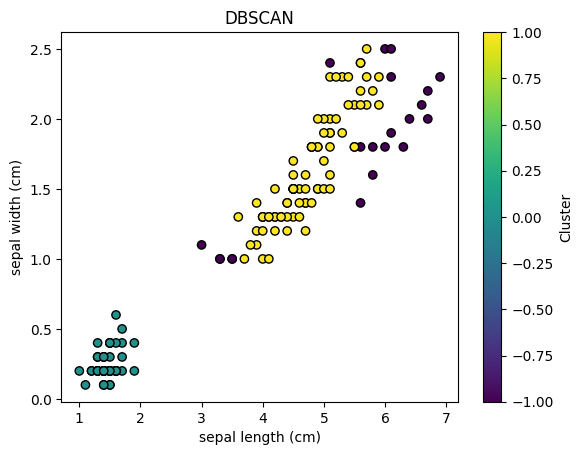

In [17]:
# 執行分群並獲取標籤
labels = dbscan.fit_predict(X)  

# 繪製散佈圖
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('DBSCAN')
plt.colorbar(label='Cluster')
plt.show()